# Hand Written Digit Recognition using Neural Network (Multi-class Classifier)

### Importing Libraries

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequentialquential
from tensorflow.keras.layers import Dense, Flatten

### Loading Dataset

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 20s 2us/step


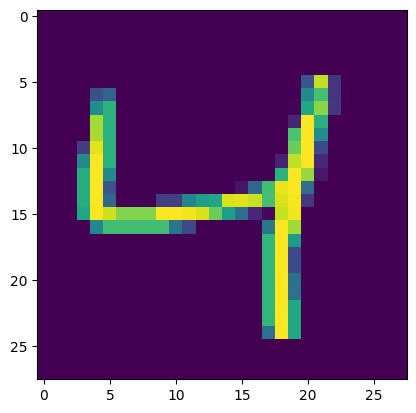

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

### Normalising

getting the values in the range [0,1]

In [12]:
x_train = x_train/255
x_test = x_test/255

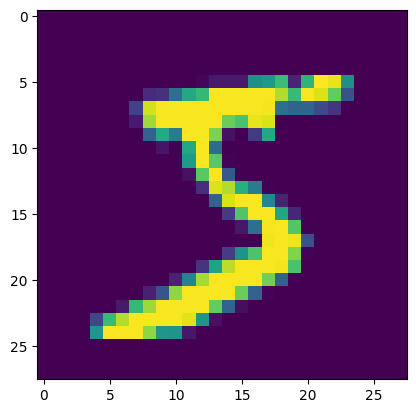

In [16]:
plt.imshow(x_train[0])

### Model architecture

In [28]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# compiles the model

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [38]:
# stores the performance of the model while training
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10

1500/1500 [==============================] - 13s 6ms/step - loss: 0.0198 - accuracy: 0.9933 - val_loss: 0.1178 - val_accuracy: 0.9736
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.1054 - val_accuracy: 0.9759
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.1226 - val_accuracy: 0.9751
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.1222 - val_accuracy: 0.9745
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.1237 - val_accuracy: 0.9744
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.1247 - val_accuracy: 0.9771
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.1322 - val_accurac

### Prediction

In [39]:
# for every image, we get 10 probabilities, each representing a digit

y_prob = model.predict(x_test)
y_prob[0]

313/313 [==============================] - 1s 3ms/step


array([4.5189502e-19, 7.8513151e-14, 2.9253704e-12, 5.1856057e-09,
       1.6368516e-16, 3.3267707e-14, 4.3118721e-23, 1.0000000e+00,
       2.4870163e-14, 2.3784932e-10], dtype=float32)

In [40]:
# we have to pick the max probability
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9771


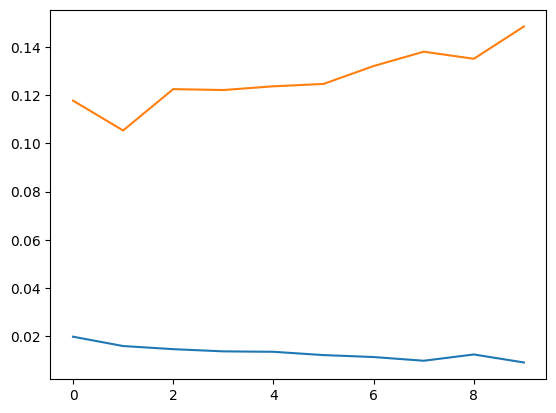

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

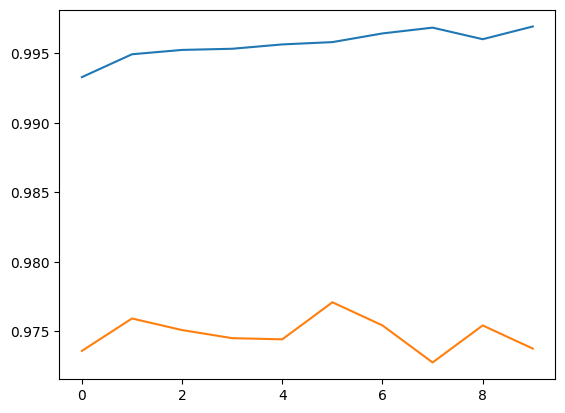

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [45]:
# prediction for a single example
model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 43ms/step


array([2], dtype=int64)